# 1. Import required libraries and read the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Apps_data+(1).csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are 10841 records in the data,
there are 13 columns out of that 12 columns are in object data type ,1 columns is in float data type.
in rating columns the majority of missing values are presents compared to other column,The data types of some columns need to be treated.

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The average rating of the apps is 4.2 the standard deviation is 0.54,25% of the apps rating is below 4,  75% of the apps in the dataset have the rating below 4.3 so most of the apps are good rated but the maximum rating is 19 it seems there is a outliers in the rating column that is right skewed it needs to br corrected,that needs to be fixed

In [8]:
df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [9]:
df.duplicated().sum()

483

There are 483 duplicates are presents

In [10]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
#duplicates were droped
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

#  5.Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [13]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

There is one invalid category 1.9

In [14]:
#droping invalid in category
df.drop(df[df["Category"]=='1.9'].index,inplace=True)

In [15]:
df.shape

(10357, 13)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
#droping the rows were rating is null
df.dropna(subset="Rating",inplace=True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [19]:
#function to replace high and low
def change(a):
    if a>3.5:
        return "high"
    else:
        return "low"

In [20]:
#applying fuctions
df['Rating_category']=df["Rating"].map(change)

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


<Axes: ylabel='proportion'>

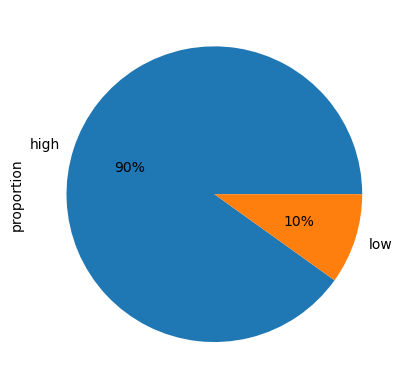

In [21]:
df['Rating_category'].value_counts(normalize=True).plot(kind="pie",autopct="%1.f%%")

The distribution is imbalanced the mojarity is 90% and minority is 10% ,most of the apps in this dataset falls under high rating,this data is not suitable to presict the rating because the portion of high and low is not balanced thus the probability of the prediction expected to more on the high  side

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [22]:
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [23]:
df["Reviews"].dtypes

dtype('int64')

<Axes: >

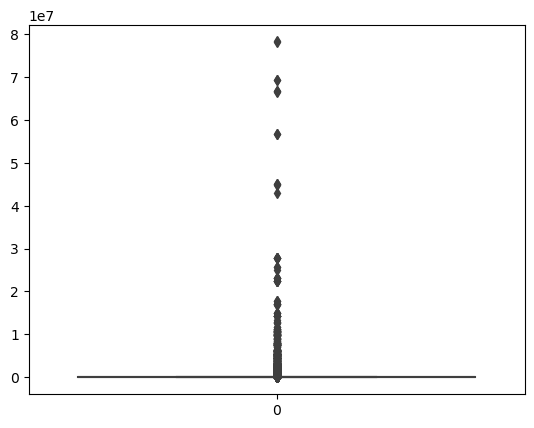

In [24]:
sns.boxplot(df["Reviews"])

In [25]:
df["Reviews"]=np.log(df["Reviews"])

<Axes: >

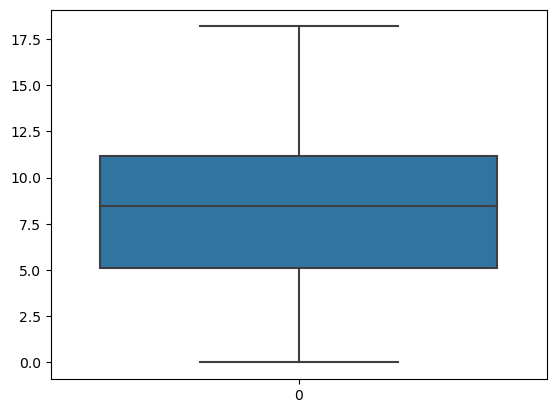

In [26]:
#After transformation
sns.boxplot(df["Reviews"])

The outliers is treated now using log transformation

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [27]:
df["Size"]=df["Size"].replace({"M":"e6","k":"e3"},regex=True)

In [28]:
df.drop(df[df["Size"]=="Varies with device"].index,inplace=True)

In [29]:
df["Size"]=df["Size"].astype(float)

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [30]:
df["Installs"]=(df["Installs"].apply(lambda x:x.strip("+")))
df["Installs"]=pd.to_numeric(df["Installs"].replace(",","",regex=True))


In [31]:
df["Installs"].dtypes

dtype('int64')

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [32]:
df["Price"]=df["Price"].replace("\$", "", regex=True)

In [33]:
df["Price"]=pd.to_numeric(df["Price"])

In [34]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [35]:
df.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [36]:
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [37]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,high


In [38]:
df["Type"].value_counts()

Type
Free    6877
Paid     547
Name: count, dtype: int64

# 13. Encode the categorical columns.

In [39]:
dummy=pd.get_dummies(data=df,columns=['Category','Content Rating'],drop_first=True)

In [40]:
dummy['Rating_category']=dummy['Rating_category'].replace({"low":0,"high":1})
dummy["Type"]=dummy["Type"].replace({"Free":0,"Paid":1})

In [41]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Reviews                       7424 non-null   float64
 1   Size                          7424 non-null   float64
 2   Installs                      7424 non-null   int64  
 3   Type                          7424 non-null   int64  
 4   Price                         7424 non-null   float64
 5   Rating_category               7424 non-null   int64  
 6   Category_AUTO_AND_VEHICLES    7424 non-null   bool   
 7   Category_BEAUTY               7424 non-null   bool   
 8   Category_BOOKS_AND_REFERENCE  7424 non-null   bool   
 9   Category_BUSINESS             7424 non-null   bool   
 10  Category_COMICS               7424 non-null   bool   
 11  Category_COMMUNICATION        7424 non-null   bool   
 12  Category_DATING               7424 non-null   bool   
 13  Categor

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [42]:
x=dummy.drop("Rating_category",axis=1)
y=dummy["Rating_category"]

# 15. Split the dataset into train and test.

In [43]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [44]:
#spliting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# 16. Standardize the data, so that the values are within a particular range.

In [45]:
#standardizing the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Deep Analysis:--

## Lets see which category has highest  number of apps

In [47]:
run=(pd.DataFrame(df.Category.value_counts(normalize=True)).reset_index())

run["running_total"]=pd.DataFrame(df.Category.value_counts(normalize=True)).reset_index()["proportion"].cumsum()*100
run

,Category,proportion,running_total
0,FAMILY,0.214305,21.430496
1,GAME,0.129176,34.348060
2,TOOLS,0.085399,42.887931
3,PERSONALIZATION,0.037581,46.646013
4,MEDICAL,0.037311,50.377155
5,LIFESTYLE,0.036773,54.054418
6,FINANCE,0.035426,57.596983
7,SPORTS,0.031250,60.721983
8,PRODUCTIVITY,0.031115,63.833513
9,BUSINESS,0.030307,66.864224


#### Here we explored the data set to look upon for  which category we have most apps are there
 ##### There are 31 unique apps categories are there in that Family,game,tools have covered 43% of the apps in this data set
   ##### remaining 27 category shares 57% ,so majority of the apps belongs to Family,Game and tools

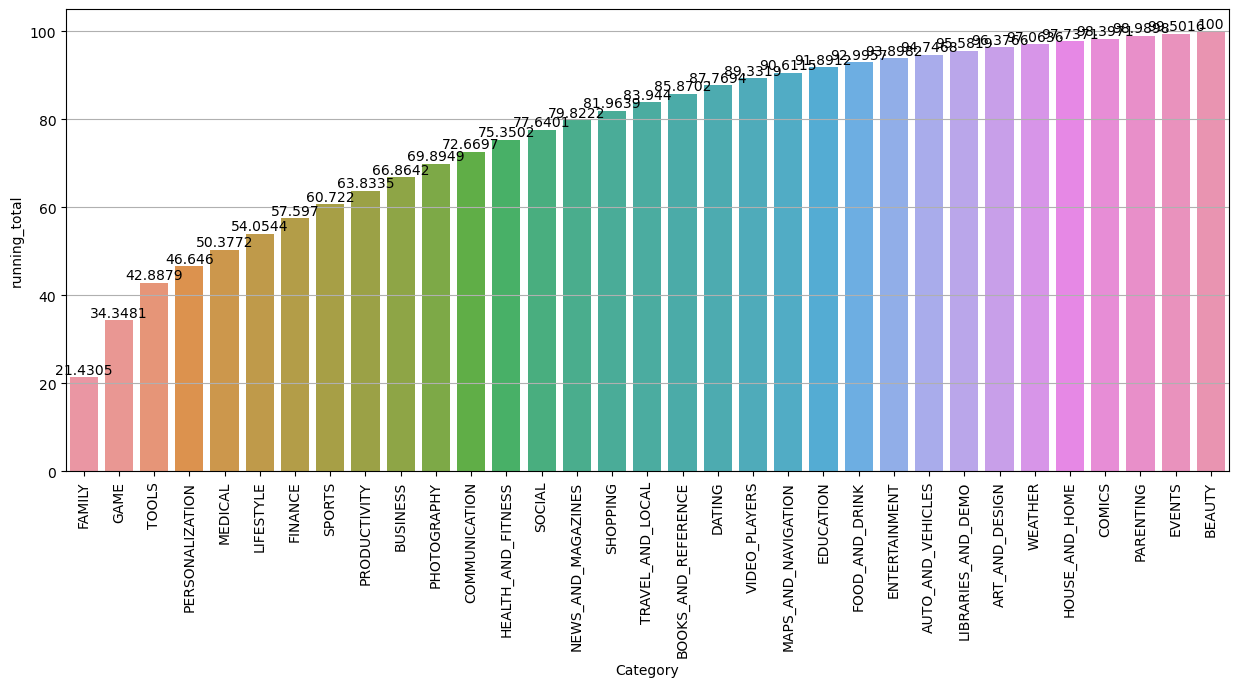

In [48]:
plt.figure(figsize=(15,6))
a=sns.barplot(data=run,y=run["running_total"],x="Category")
plt.xticks(rotation=90)
plt.bar_label(a.containers[0])
plt.grid(axis="y")
plt.show()

 The above chart shows the running total of percentage(cumulative) of apps present
    By this we can see what all category have most of the apps

## Lets see which category have highest installs

In [49]:
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [50]:
pd.options.display.float_format = '{:.2f}'.format

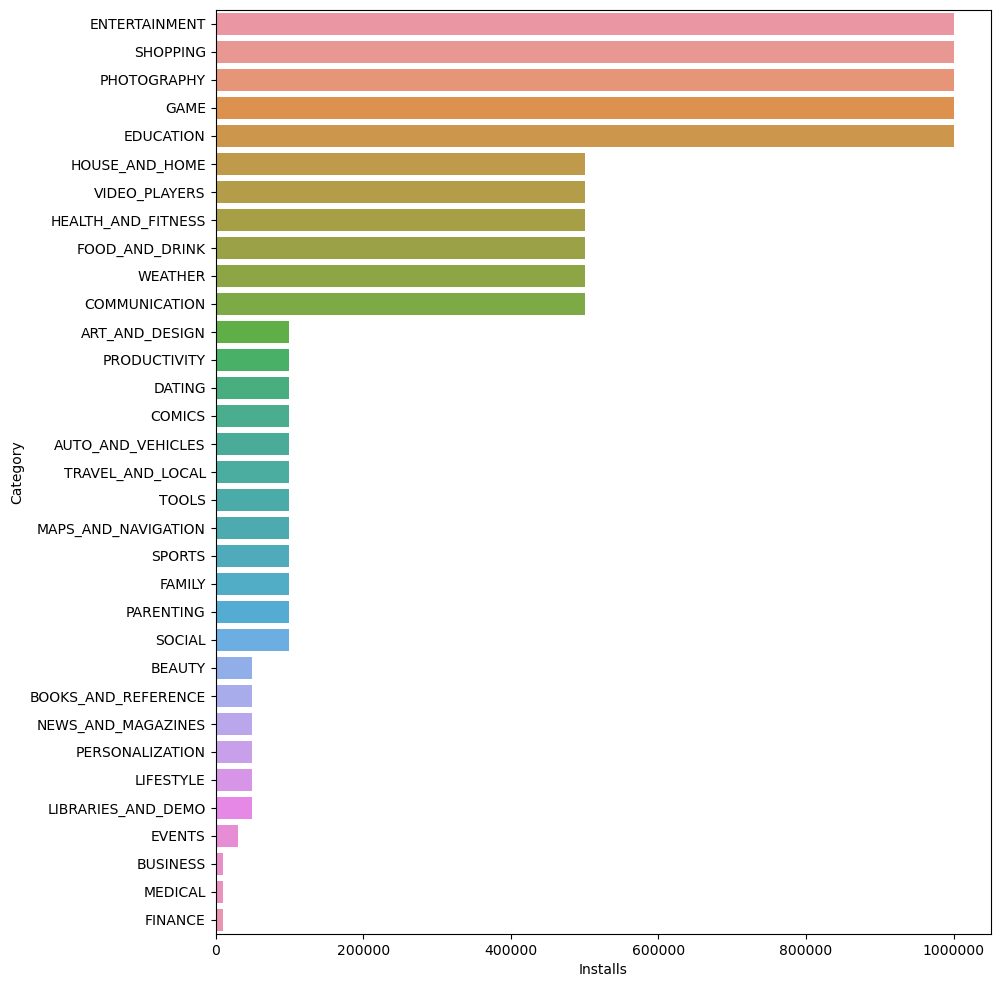

In [124]:
plt.figure(figsize=(10,12))
sns.barplot(data=pd.DataFrame(df.groupby("Category")["Installs"].median().sort_values(ascending=False)).reset_index(),x="Installs",y="Category")
plt.ticklabel_format(style="plain",axis="x")
plt.show()

## Insights observed:
#### In the bar chart we Visualized the average Numbers of Installs for Each category 
#### This Gives us the insights that the apps which belongs to Gaming category have most installs
#### The top 2 is News and magazin and top 3 is communication.
#### from this charts we can see the top and bottom categories of installs
#### apps related to gaming is high in demand

##  checking Installs destribution to decide which aggregate function to be used to analyse

<Axes: xlabel='Installs', ylabel='Category'>

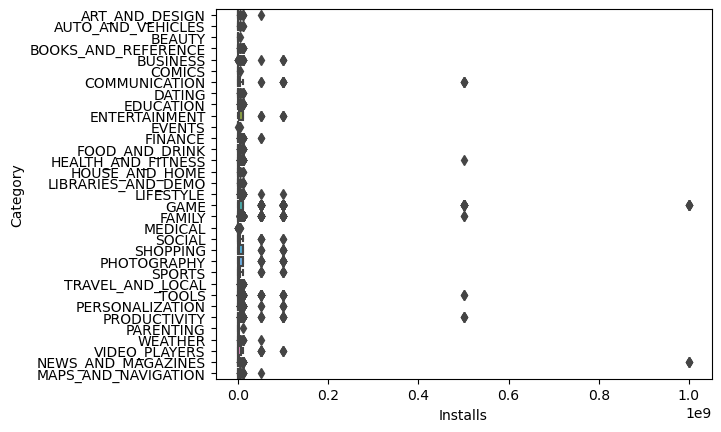

In [115]:
sns.boxplot(data=df,y="Category",x="Installs")

###  Here we can see that in all the category installs there is outliers  so for our further analysis we use "median" as aggregate function in  order to minimise the effect of outliers

### Explore free and paid apps

In [52]:
df["Type"].value_counts()

Type
Free    6877
Paid     547
Name: count, dtype: int64

##### In this data set over 6877 apps are free and 547 apps are paid 

<Axes: xlabel='Price', ylabel='Category'>

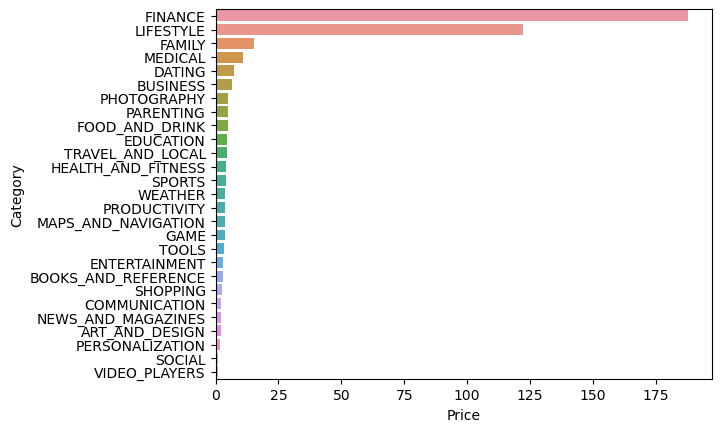

In [53]:
sns.barplot(data=df.query("Type=='Paid'").groupby("Category",as_index=False)["Price"].mean().sort_values(by="Price",ascending=False),x="Price",y="Category")

The above graph ploted the average price of apps category, we can  observe the apps beongs to Finacial category have Highest price followed by lifestyle and family

<Axes: xlabel='Category'>

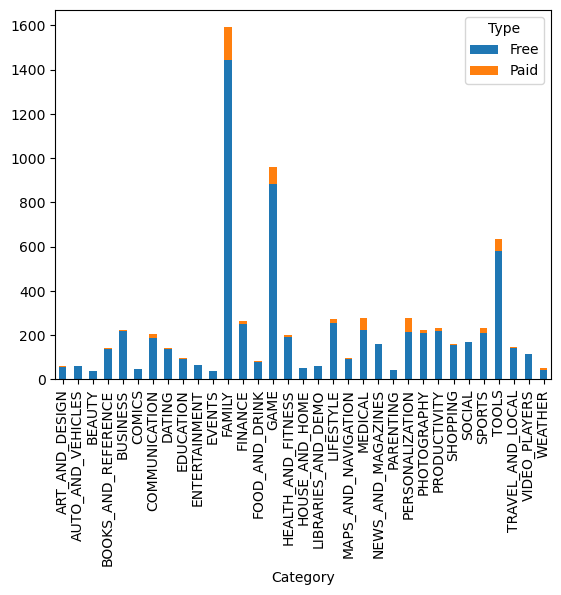

In [54]:
pd.crosstab(df["Category"],df["Type"]).plot.bar(stacked=True)


In [76]:
df[df["Type"]=="Paid"].groupby("Category")["Installs"].count()

Category
ART_AND_DESIGN           3
BOOKS_AND_REFERENCE      7
BUSINESS                 8
COMMUNICATION           18
DATING                   2
EDUCATION                4
ENTERTAINMENT            1
FAMILY                 147
FINANCE                 13
FOOD_AND_DRINK           1
GAME                    75
HEALTH_AND_FITNESS       8
LIFESTYLE               16
MAPS_AND_NAVIGATION      4
MEDICAL                 55
NEWS_AND_MAGAZINES       2
PARENTING                1
PERSONALIZATION         63
PHOTOGRAPHY             13
PRODUCTIVITY            14
SHOPPING                 2
SOCIAL                   2
SPORTS                  20
TOOLS                   55
TRAVEL_AND_LOCAL         6
VIDEO_PLAYERS            1
WEATHER                  6
Name: Installs, dtype: int64

In [121]:
ordered=df[df["Type"]=="Paid"].groupby("Category")["Installs"].median().sort_values(ascending=False).index

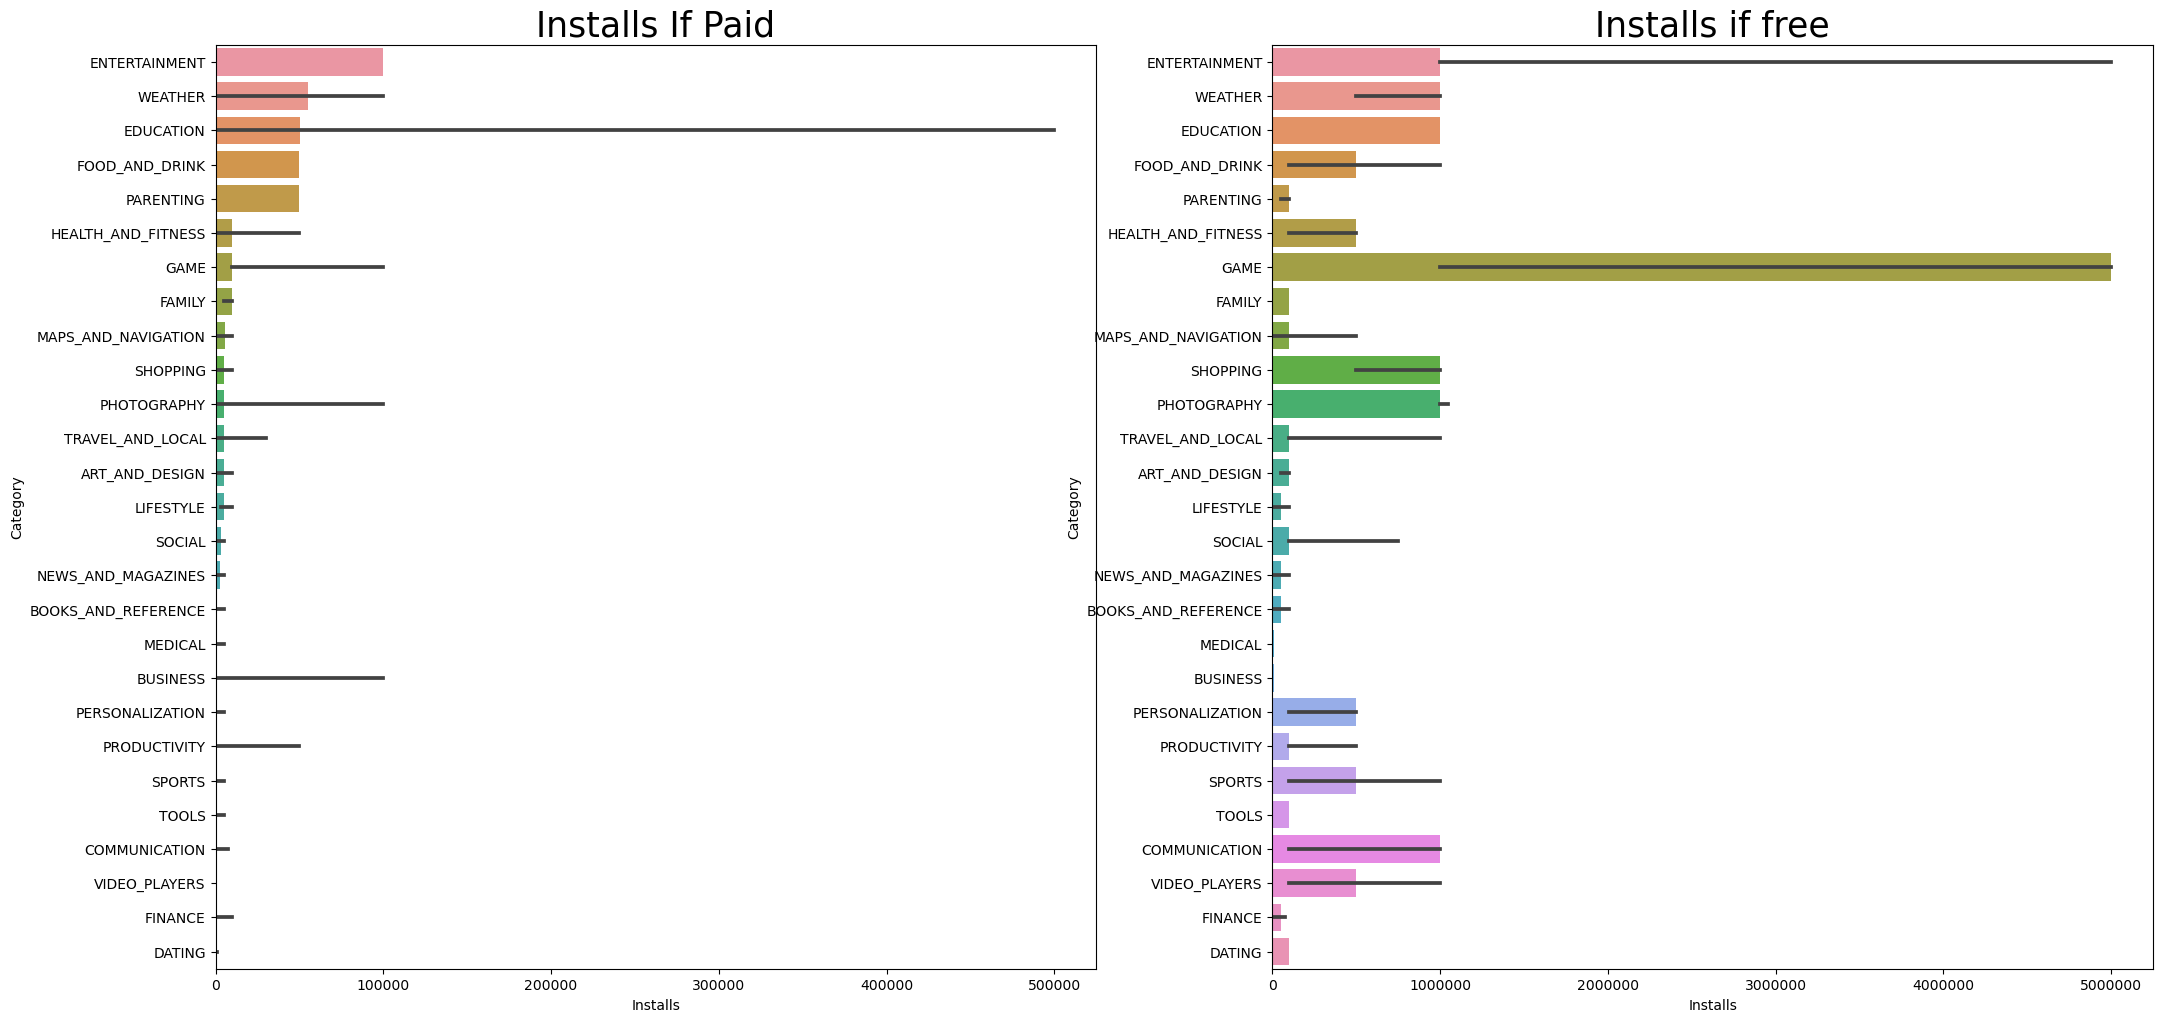

In [122]:
plt.figure(figsize=(25,12))
plt.subplot(1,2,1)
plt.title("Installs If Paid",size=25)
sns.barplot(data=df[df["Type"]=="Paid"],x="Installs",y="Category", estimator="median",order=ordered)
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(1,2,2)
plt.title("Installs if free",size=25)
sns.barplot(data=df[df["Type"]=="Free"],x="Installs",y="Category",estimator="median",order=ordered)
plt.ticklabel_format(style='plain', axis='x')

#### From the Above 1 St chart we can get the very important insight that customer may like to pay for the apps of entertaiment, Education and some other few category ,
#### We can also see Apps blongs to Dating,video player are have very less download when it is paid  and when it is free there are many doemloads 
   ## By this charts we get to know  for which apps category  can charge and customer willing to use the apps

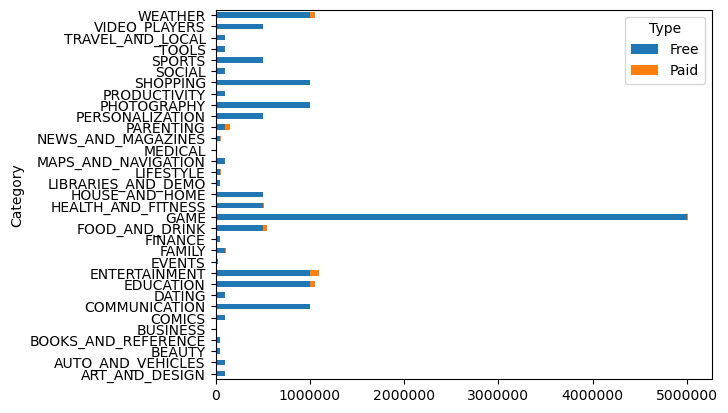

In [120]:
df.pivot_table(values="Installs",index="Category",columns="Type",aggfunc="median",fill_value=0).plot.barh(stacked=True)
plt.ticklabel_format(style="plain",axis='x')

### Customer dowload the apps most if it it free to use 
#### the orange shade on the graph shows the  average of installs of apps in particular category

<Axes: >

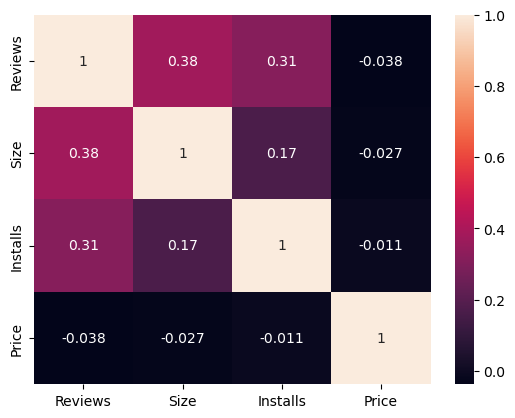

In [57]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)

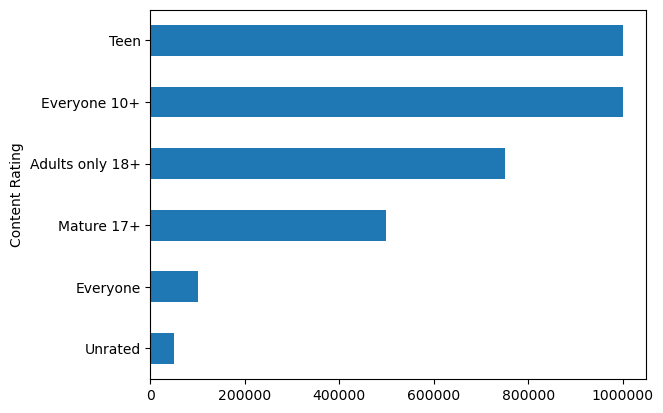

In [119]:
df.groupby("Content Rating")["Installs"].median().sort_values(ascending=True).plot.barh()
plt.ticklabel_format(style="plain",axis='x')

In [59]:
df.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.07,19000000.00,10000,Free,0.00,Everyone,high
1,ART_AND_DESIGN,6.87,14000000.00,500000,Free,0.00,Everyone,high
2,ART_AND_DESIGN,11.38,8700000.00,5000000,Free,0.00,Everyone,high
